##ThinkDSP

This notebook contains code solutions to exercises in Chapter 3: Non-periodic signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [5]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import numpy as np

%matplotlib inline

**Exercise:** Run and listen to the examples in chap03.ipynb.  In the leakage example, try replacing the Hamming window with one of the other windows provided by NumPy, and see what effect they have on leakage. 

See http://docs.scipy.org/doc/numpy/reference/routines.window.html

Here's the leakage example:

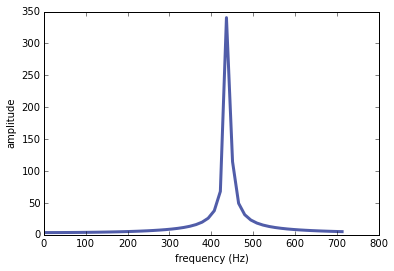

In [10]:
signal = thinkdsp.SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

thinkplot.preplot(1)
spectrum.plot(high=50)
thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude', legend=False)

The following figure shows the effect of 4 different windows.

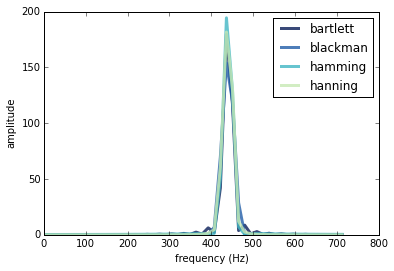

In [11]:
thinkplot.preplot(4)

for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=50, label=window_func.__name__)

    
thinkplot.config(xlabel='frequency (Hz)', ylabel='amplitude', legend=True)

All four do a good job of reducing leakage.  The Bartlett filter leaves some residual "ringing".  The Hamming filter dissipates the least amount of energy. 

**Exercise 3.2**: Write a class called `SawtoothChirp` that extends `Chirp` and overrides evaluate to generate a sawtooth waveform with frequency that increases (or decreases) linearly.

In [ ]:
import math
PI2 = 2 * math.pi

class SawtoothChirp(thinkdsp.Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def _evaluate(self, ts, freqs):
        """Helper function that evaluates the signal.

        ts: float array of times
        freqs: float array of frequencies during each interval
        """
        dts = numpy.diff(ts)
        dps = PI2 * freqs * dts
        phases = numpy.cumsum(dps)
        phases = numpy.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = numpy.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys


Here's what it sounds like.

In [ ]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=2, framerate=10000)
wave.apodize()
wave.make_audio()

And here's the spectrogram.

In [ ]:
sp = wave.make_spectrogram(1024)
sp.plot()
thinkplot.config(xlabel='time (s)', ylabel='frequency (Hz)', legend=False)

At a relatively low frame rate, you can see the aliased harmonics bouncing off the folding frequency.  And you can hear them as a background hiss.  If you crank up the frame rate, they go away.

**Exercise 3.3**: In musical terminology, a “glissando” is a note that slides from one pitch to another, so it is similar to a chirp. A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length.

In [ ]:
class TromboneGliss(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = numpy.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

Write a function that simulates a trombone glissando from C4 up to F4 and back down to C4. C3 is 262 Hz; F3 is 349 Hz.

Assuming that the player moves the slide at a constant speed, how does frequency vary with time? Is a trombone glissando more like a linear or exponential chirp?

Here's the first part of the wave:

In [ ]:
low = 262
high = 340
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

And the second part:

In [ ]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Putting them together:

In [ ]:
wave = wave1 | wave2
wave.make_audio()

Here's the spectrogram:

In [ ]:
sp = wave.make_spectrogram(1024)
sp.plot(high=40)

**Exercise 3.4**  Find or make a recording of a glissando and plot a spectrogram of the
first few seconds.  

In [ ]:
wave = thinkdsp.read_wave('72475__rockwehrmann__glissup02.wav')
wave.make_audio()

In [ ]:
wave.make_spectrogram(512).plot(high=50)

**Exercise 3.5**  Make or find a recording of a series of vowel sounds and look at the
spectrogram.  Can you identify different vowels?

In [12]:
wave = thinkdsp.read_wave('87778__marcgascon7__vocals.wav')
wave.make_audio()

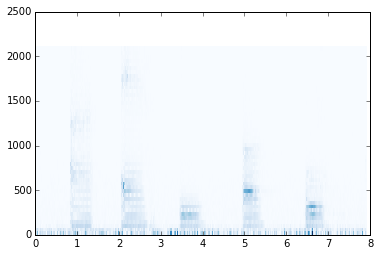

In [15]:
wave.make_spectrogram(1024).plot(high=50)

The stripe across the bottom is probably background noise.  The peaks in the spectrogram are called "formants".

In general, vowel sounds are distinguished by the amplitude ratios of the first two formants relative to the fundamental.  For more, see https://en.wikipedia.org/wiki/Formant

We can see the formats more clearly by selecting a segment during 'ah'.

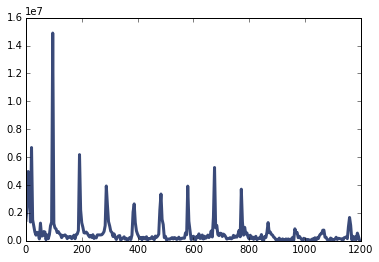

In [24]:
high = 300
thinkplot.preplot(5)

segment = wave.segment(start=1, duration=0.25)
segment.make_spectrum().plot(high=high)

The fundamental is near 100 Hz.  The next highest peaks are at 200 Hz and 700 Hz.  People who know more about this than I do can identify vowels by looking at spectrums, but I can't.

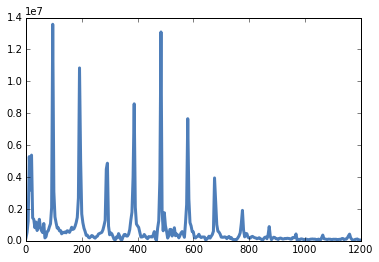

In [25]:
segment = wave.segment(start=2.2, duration=0.25)
segment.make_spectrum().plot(high=high)

The 'eh' segment has a high-amplitude formant near 500 Hz.

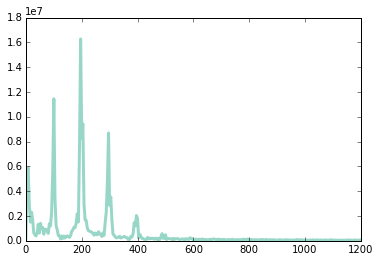

In [27]:
segment = wave.segment(start=3.5, duration=0.25)
segment.make_spectrum().plot(high=high)

The 'ih' segment has no high frequency components.

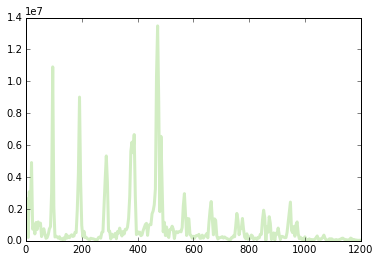

In [28]:
segment = wave.segment(start=5.1, duration=0.25)
segment.make_spectrum().plot(high=high)

The 'aw' segment has a high-amplitude formant near 500 Hz, even higher than the fundamental.

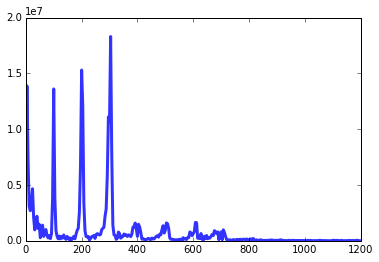

In [29]:
segment = wave.segment(start=6.5, duration=0.25)
segment.make_spectrum().plot(high=high)

The 'eu' segment has a high-amplitude formant near 300 Hz and no high-frequency components